# Лаборатная работа 4

**Выполнила:** Сидельникова Дарья Николаевна

Библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. Анализ и предобработка



In [ ]:
df = pd.read_csv('credit_scoring.csv')
df

client_id          DIR   Age  NumLoans  NumRealEstateLoans  \
0              0     0.496289  49.1        13                   0   
1              1     0.433567  48.0         9                   2   
2              2  2206.731199  55.5        21                   1   
3              3   886.132793  55.3         3                   0   
4              4     0.000000  52.3         1                   0   
...          ...          ...   ...       ...                 ...   
74995      74995     0.169463  67.6         5                   1   
74996      74996  2085.662215  43.2         1                   1   
74997      74997     0.118935  23.0         4                   0   
74998      74998     0.203414  46.3        14                   2   
74999      74999     0.037120  57.4        13                   0   

       NumDependents  Num30-59Delinquencies  Num60-89Delinquencies  \
0                0.0                      2                      0   
1                2.0                      1                      0   
2                NaN                      1                      0   
3                0.0                      0                      0   
4                0.0                      0                      0   
...              ...                    ...                    ...   
74995            0.0                      0                      0   
74996            0.0                      0                      0   
74997            0.0                      2                      0   
74998            0.0                      0                      0   
74999            0.0                      0                      0   

             Income  BalanceToCreditLimit  Delinquent90  
0       5298.360639              0.387028             0  
1       6008.056256              0.234679             0  
2               NaN              0.348227             0  
3               NaN              0.971930             0  
4       2504.613105              1.004350             0  
...             ...                   ...           ...  
74995  20129.654428              0.074689             0  
74996           NaN              1.005390             0  
74997   2019.117329              0.384511             0  
74998  16823.909642              0.524093             0  
74999  10556.892855              0.075616             0  

[75000 rows x 11 columns]

client_id - ID клиента (неотрицательное целое число)

Age - возраст (вещественный)

Income - месячный доход (вещественный)

BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)

DIR - Debt-to-income Ratio (вещественный)

NumLoans - число заемов и кредитных линий

NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)

NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)

Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)

Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)

Delinquent90 - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
 10  Delinquent90           75000 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 6.3 MB


Обработаем пропуски

In [ ]:
income_median = df['Income'].median()
df['Income'] = np.where(df['Income'].isna(), income_median, df['Income'])

In [ ]:
for col in df.columns:
    pct_missing = df[col].isnull().mean()
    print('{} - {}%'.format(col, round(pct_missing*100)))

client_id - 0%
DIR - 0%
Age - 0%
NumLoans - 0%
NumRealEstateLoans - 0%
NumDependents - 3%
Num30-59Delinquencies - 0%
Num60-89Delinquencies - 0%
Income - 0%
BalanceToCreditLimit - 0%
Delinquent90 - 0%


Пропуски значений в NumDependents - 3%, могу оставить

Описательная статистика

In [ ]:
df. describe( include='all').T

count          mean           std   min  \
client_id              75000.0  37499.500000  21650.779432   0.0   
DIR                    75000.0    353.260293   2117.237432   0.0   
Age                    75000.0     52.595605     14.869729  21.0   
NumLoans               75000.0      8.449760      5.156440   0.0   
NumRealEstateLoans     75000.0      1.016693      1.124019   0.0   
NumDependents          73084.0      0.755966      1.108119   0.0   
Num30-59Delinquencies  75000.0      0.428320      4.276439   0.0   
Num60-89Delinquencies  75000.0      0.248000      4.239486   0.0   
Income                 75000.0   6479.641558  12753.557102   0.0   
BalanceToCreditLimit   75000.0      6.276196    267.743321   0.0   
Delinquent90           75000.0      0.066840      0.249746   0.0   

                                25%           50%           75%           max  
client_id              18749.750000  37499.500000  56249.250000  7.499900e+04  
DIR                        0.176022      0.366848      0.862650  3.326003e+05  
Age                       41.300000     52.200000     63.100000  1.098000e+02  
NumLoans                   5.000000      8.000000     11.000000  5.600000e+01  
NumRealEstateLoans         0.000000      1.000000      2.000000  3.200000e+01  
NumDependents              0.000000      0.000000      1.000000  2.000000e+01  
Num30-59Delinquencies      0.000000      0.000000      0.000000  9.800000e+01  
Num60-89Delinquencies      0.000000      0.000000      0.000000  9.800000e+01  
Income                  3948.961392   5424.552473   7406.508553  1.805573e+06  
BalanceToCreditLimit       0.029703      0.153720      0.560638  5.087387e+04  
Delinquent90               0.000000      0.000000      0.000000  1.000000e+00

EDA

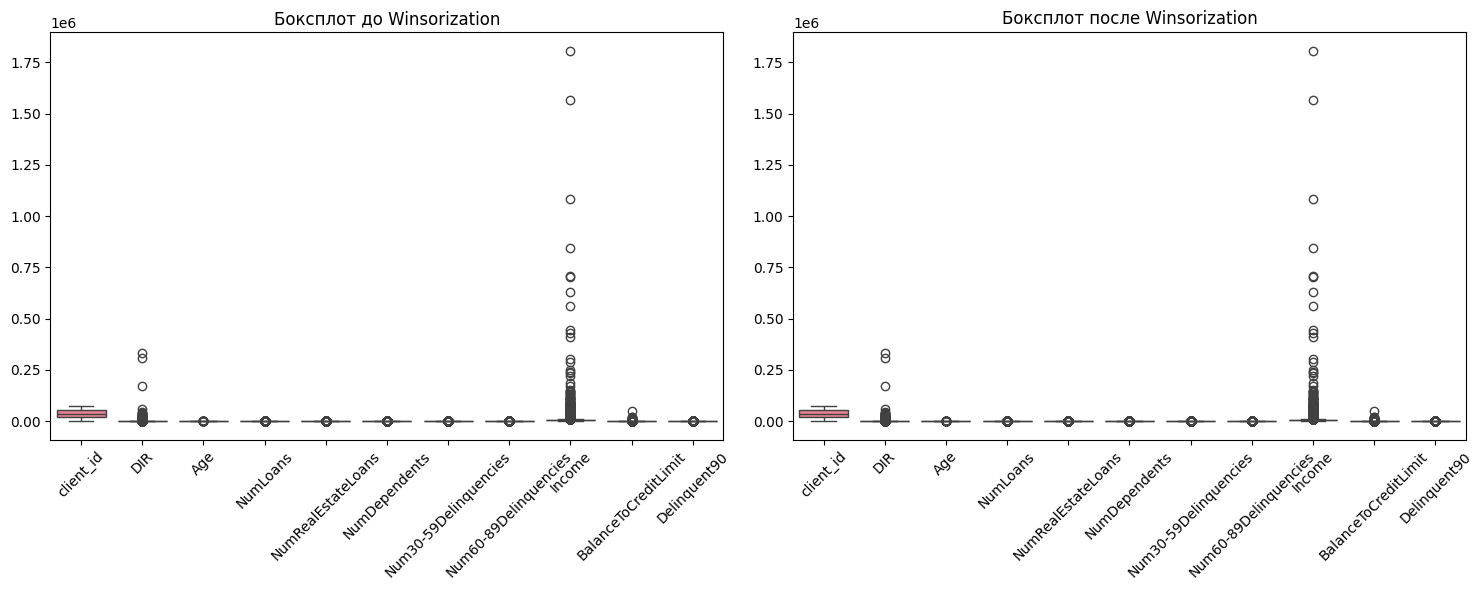

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=df[num_cols], ax=axes[0])
axes[0].set_title('Боксплот до Winsorization')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df[num_cols], ax=axes[1])
axes[1].set_title('Боксплот после Winsorization')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


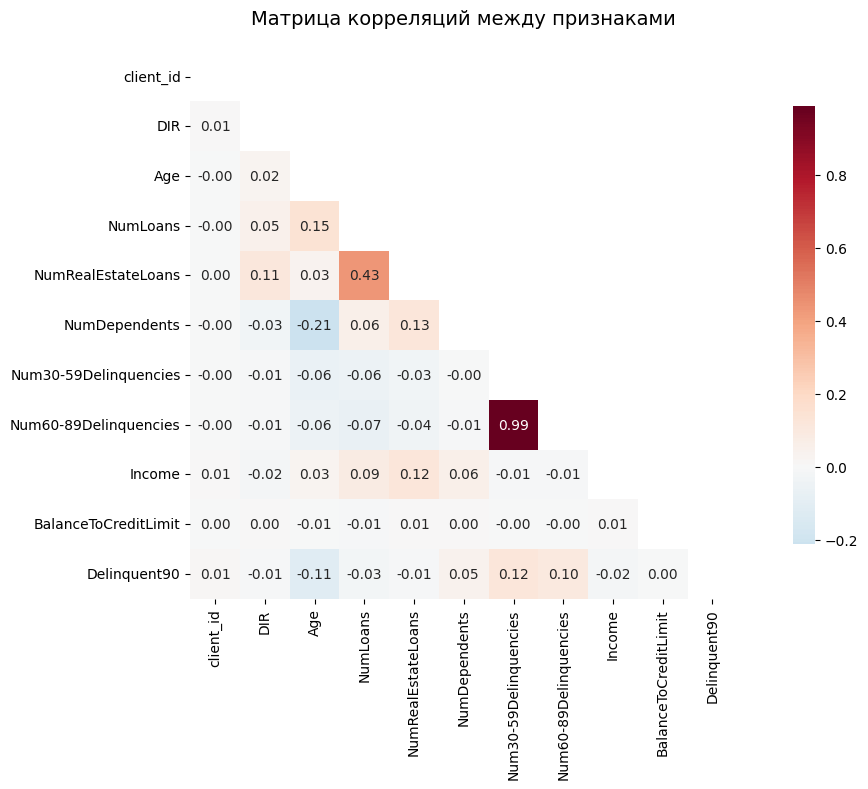

Сильные корреляции:
  Num30-59Delinquencies ↔ Num60-89Delinquencies: 0.987


In [ ]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций между признаками', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            strong_corr.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_matrix.iloc[i, j]
            ))

if strong_corr:
    print("Сильные корреляции:")
    for feat1, feat2, corr in strong_corr:
        print(f"  {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("\nСильных корреляций нет")


Скалирование, столбец Delinquent90 оставляем

In [ ]:
num_cols_to_scale = df.select_dtypes(include=np.number).columns.tolist()
if 'Delinquent90' in num_cols_to_scale:
    num_cols_to_scale.remove('Delinquent90')

scaler = StandardScaler()

df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

display(df.head())

client_id       DIR       Age  NumLoans  NumRealEstateLoans  NumDependents  \
0  -1.732028 -0.166616 -0.235084  0.882444           -0.904522      -0.682211   
1  -1.731982 -0.166646 -0.309060  0.106710            0.874819       1.122662   
2  -1.731935  0.875425  0.195324  2.433913           -0.014852            NaN   
3  -1.731889  0.251685  0.181874 -1.056891           -0.904522      -0.682211   
4  -1.731843 -0.166851 -0.019880 -1.444758           -0.904522      -0.682211   

   Num30-59Delinquencies  Num60-89Delinquencies    Income  \
0               0.367523              -0.058498 -0.092624   
1               0.133682              -0.058498 -0.036977   
2               0.133682              -0.058498 -0.082730   
3              -0.100159              -0.058498 -0.082730   
4              -0.100159              -0.058498 -0.311682   

   BalanceToCreditLimit  Delinquent90  
0             -0.021996             0  
1             -0.022565             0  
2             -0.022141             0  
3             -0.019811             0  
4             -0.019690             0

делим данные на валидационную, тестовую и обучающую выборку


In [ ]:
X = df.drop('Delinquent90', axis=1)
y = df['Delinquent90']

X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

In [ ]:
print("Обучающая выборка:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nВалидационная выборка:")
print(f"X_val: {X_val.shape}")
print(f"y_val: {y_val.shape}")
print("\nТестовая выборка:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Обучающая выборка:
X_train: (52500, 10)
y_train: (52500,)

Валидационная выборка:
X_val: (11250, 10)
y_val: (11250,)

Тестовая выборка:
X_test: (11250, 10)
y_test: (11250,)


# 2. Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

увидим все дерево

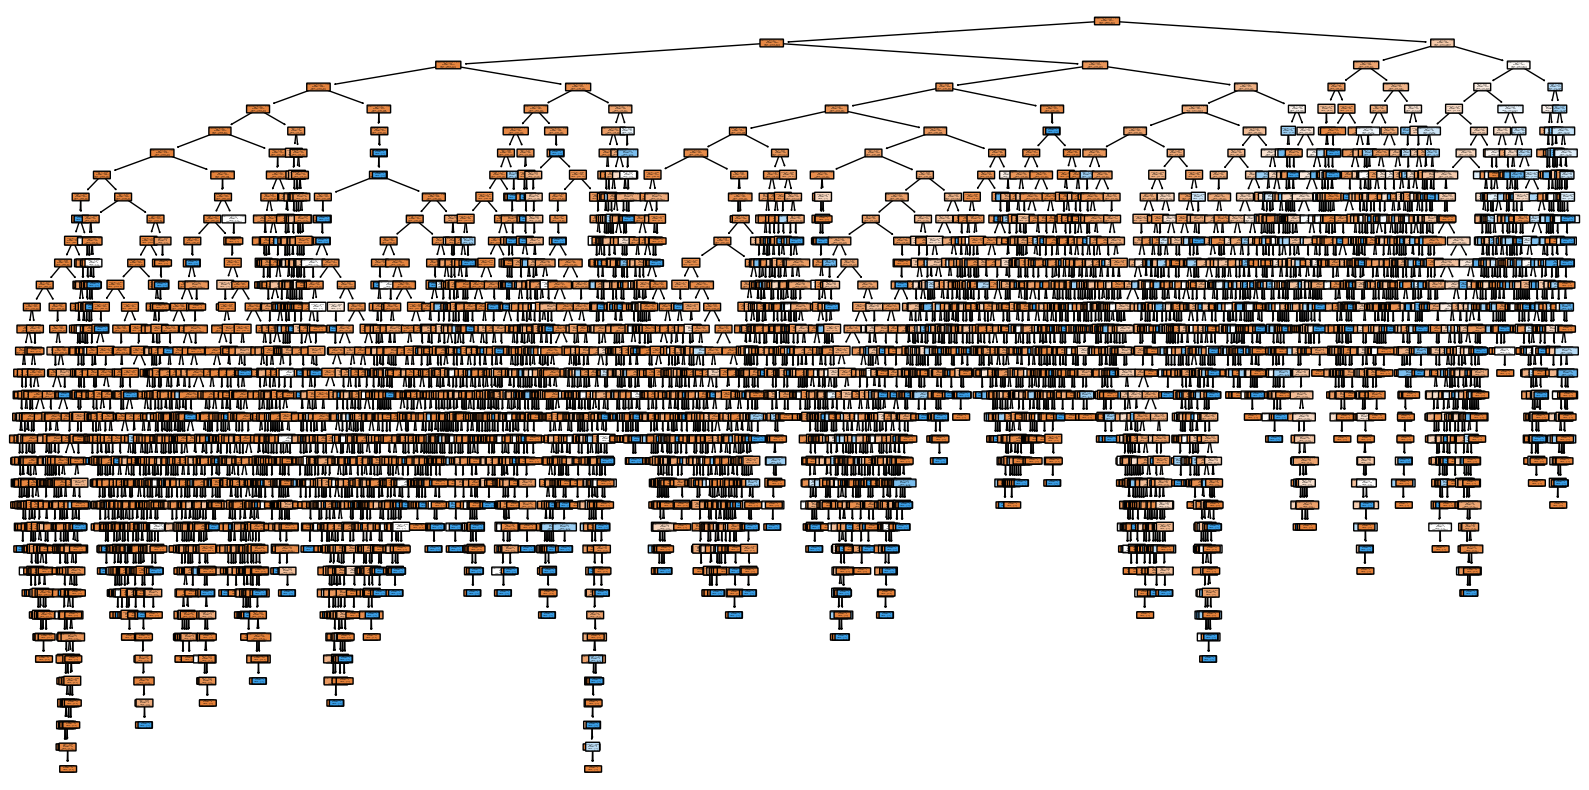

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.show()

# 2. b. Рассмотреть, как изменение глубины дерева влияет на качество модели.

Обучим дерево решений с различной глубиной (от 1 до 11).

Оценим точность модели для каждой глубины.

Построим график, чтобы проанализировать, когда начинается переобучение.


In [ ]:
y_val_pred = dt_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Оценка модели:
Accuracy: 0.8876
Precision: 0.2089
Recall: 0.2447
F1-score: 0.2254


In [ ]:
tree_depth = dt_model.get_depth()
print(f"Глубина дерева решений: {tree_depth}")

Глубина дерева решений: 34


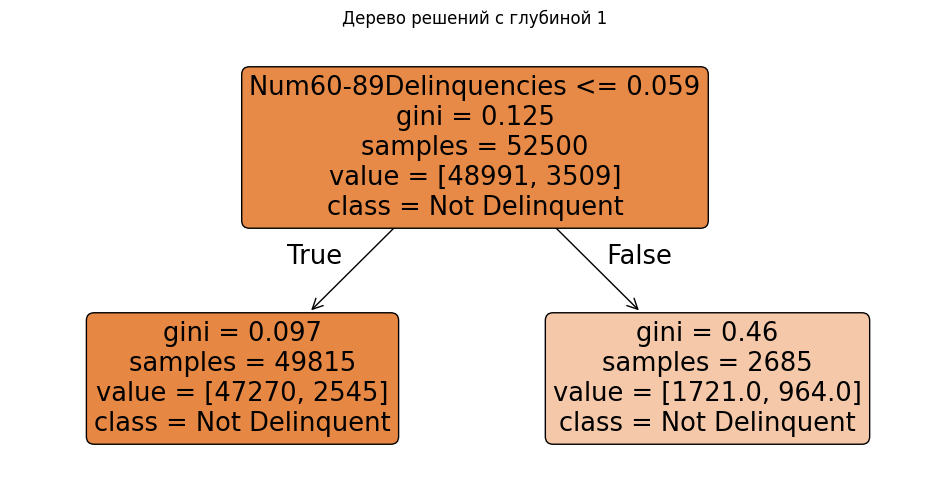

Оценка модели 1:
Accuracy: 0.9332
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt_model_1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_model_1.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(dt_model_1, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 1")
plt.show()

y_val_pred = dt_model_1.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 1:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

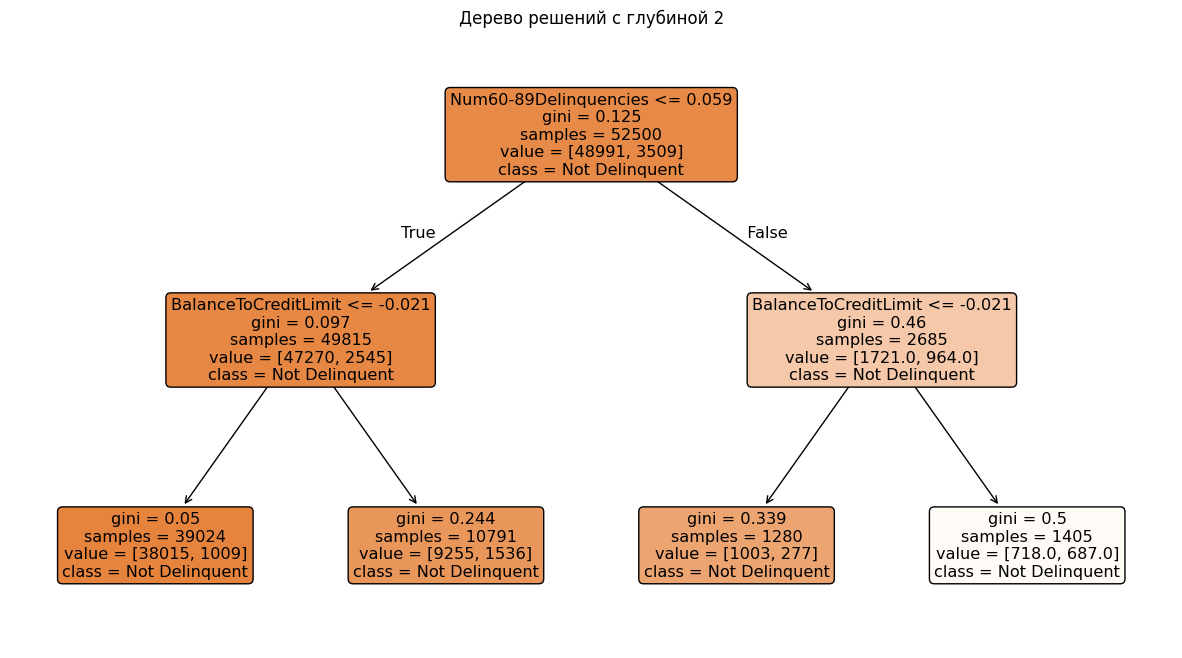

Оценка модели 2:
Accuracy: 0.9332
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
dt_model_2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model_2.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(dt_model_2, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 2")
plt.show()

y_val_pred = dt_model_2.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 2:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

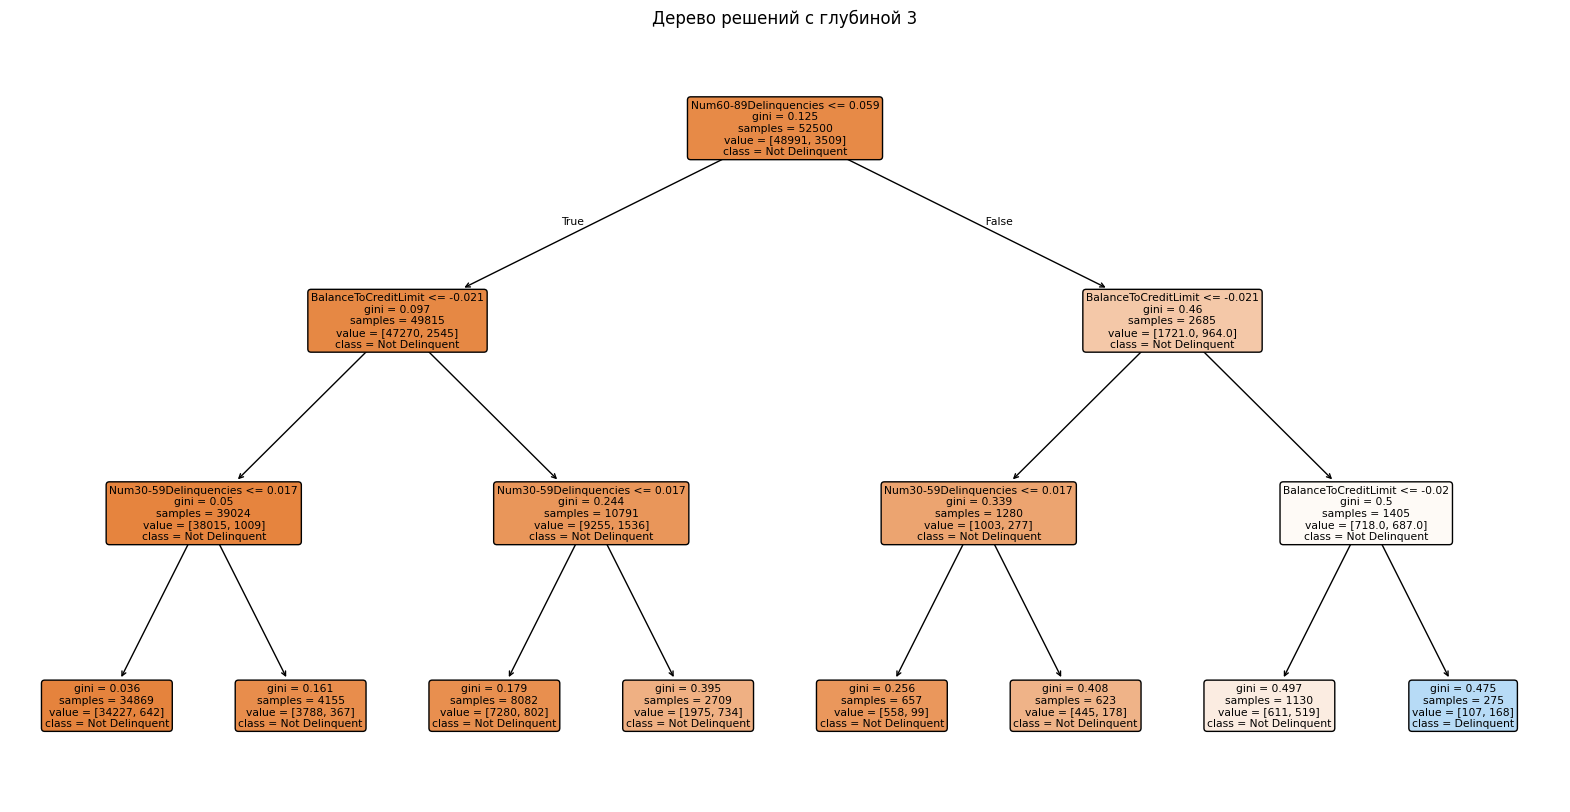

Оценка модели 3:
Accuracy: 0.9345
Precision: 0.6154
Recall: 0.0532
F1-score: 0.0979


In [ ]:
dt_model_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model_3.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_3, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 3")
plt.show()

y_val_pred = dt_model_3.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 3:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

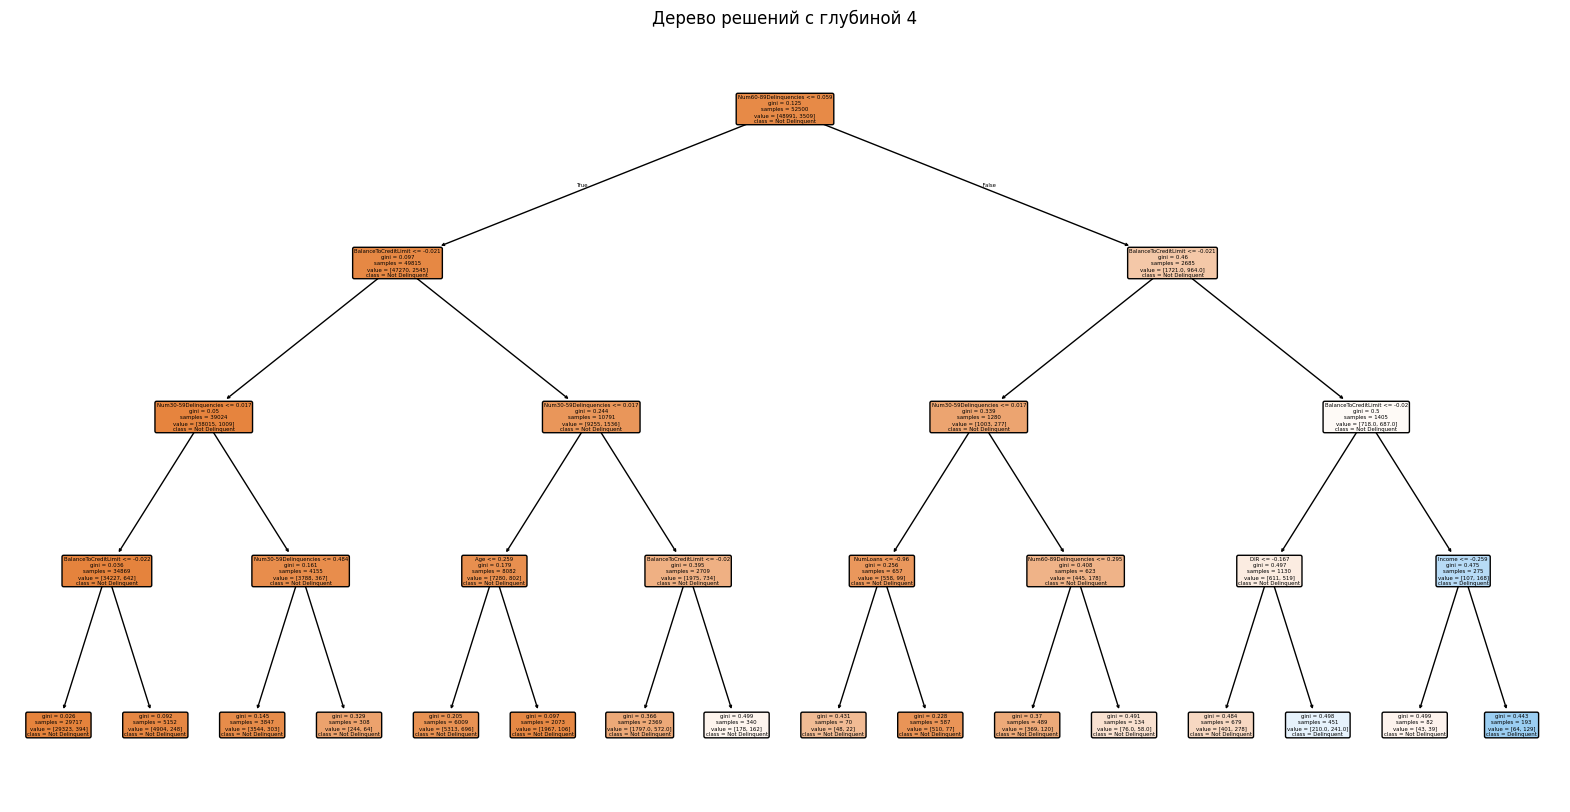

Оценка модели 4:
Accuracy: 0.9347
Precision: 0.5570
Recall: 0.1104
F1-score: 0.1842


In [ ]:
dt_model_4 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_4.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_4, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 4")
plt.show()

y_val_pred = dt_model_4.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 4:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

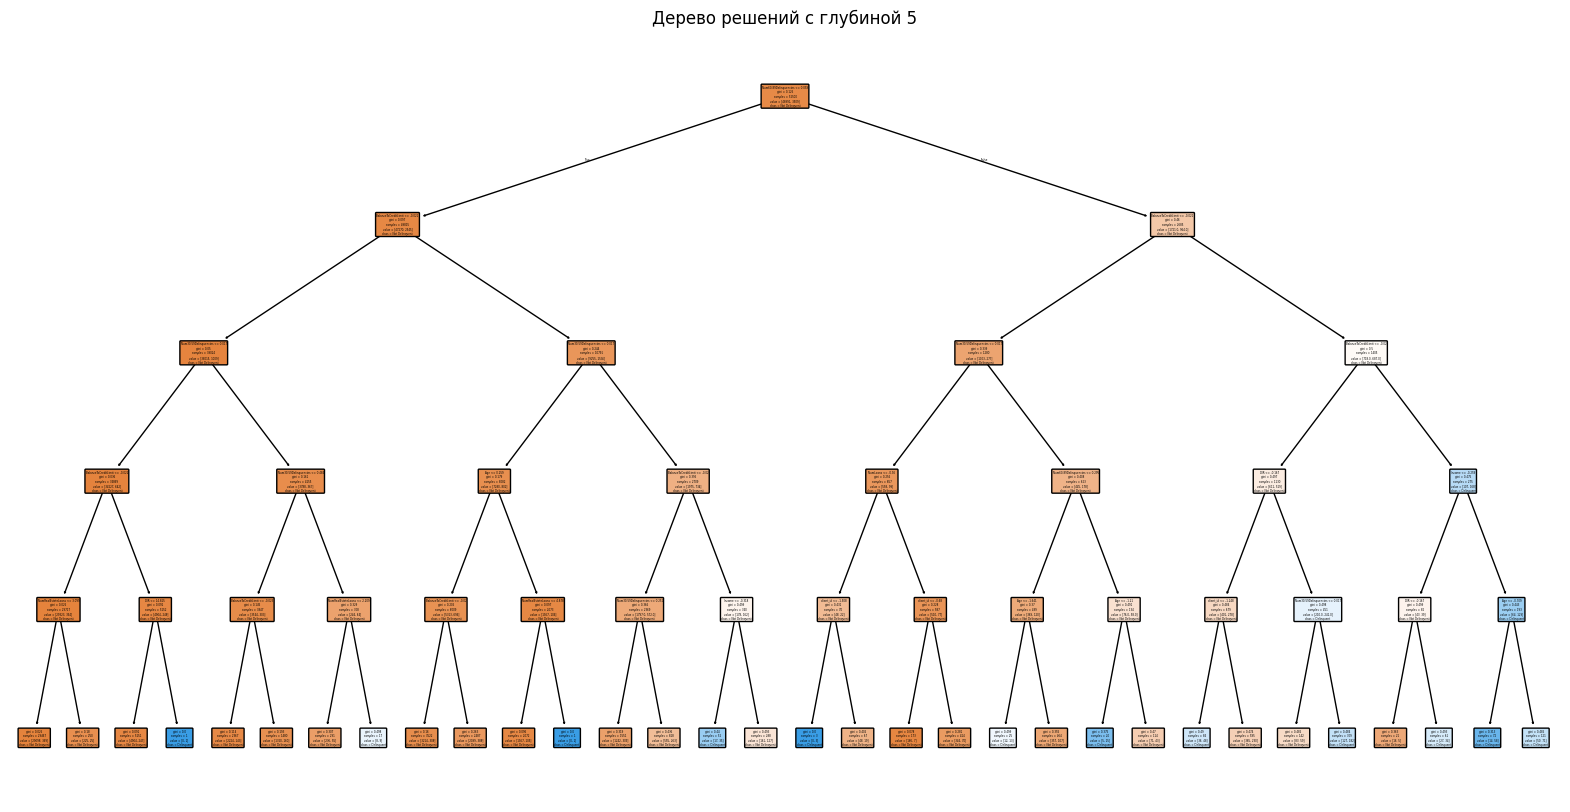

Оценка модели 5:
Accuracy: 0.9346
Precision: 0.5440
Recall: 0.1316
F1-score: 0.2120


In [ ]:
dt_model_5 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_5.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_5, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 5")
plt.show()

y_val_pred = dt_model_5.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 5:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

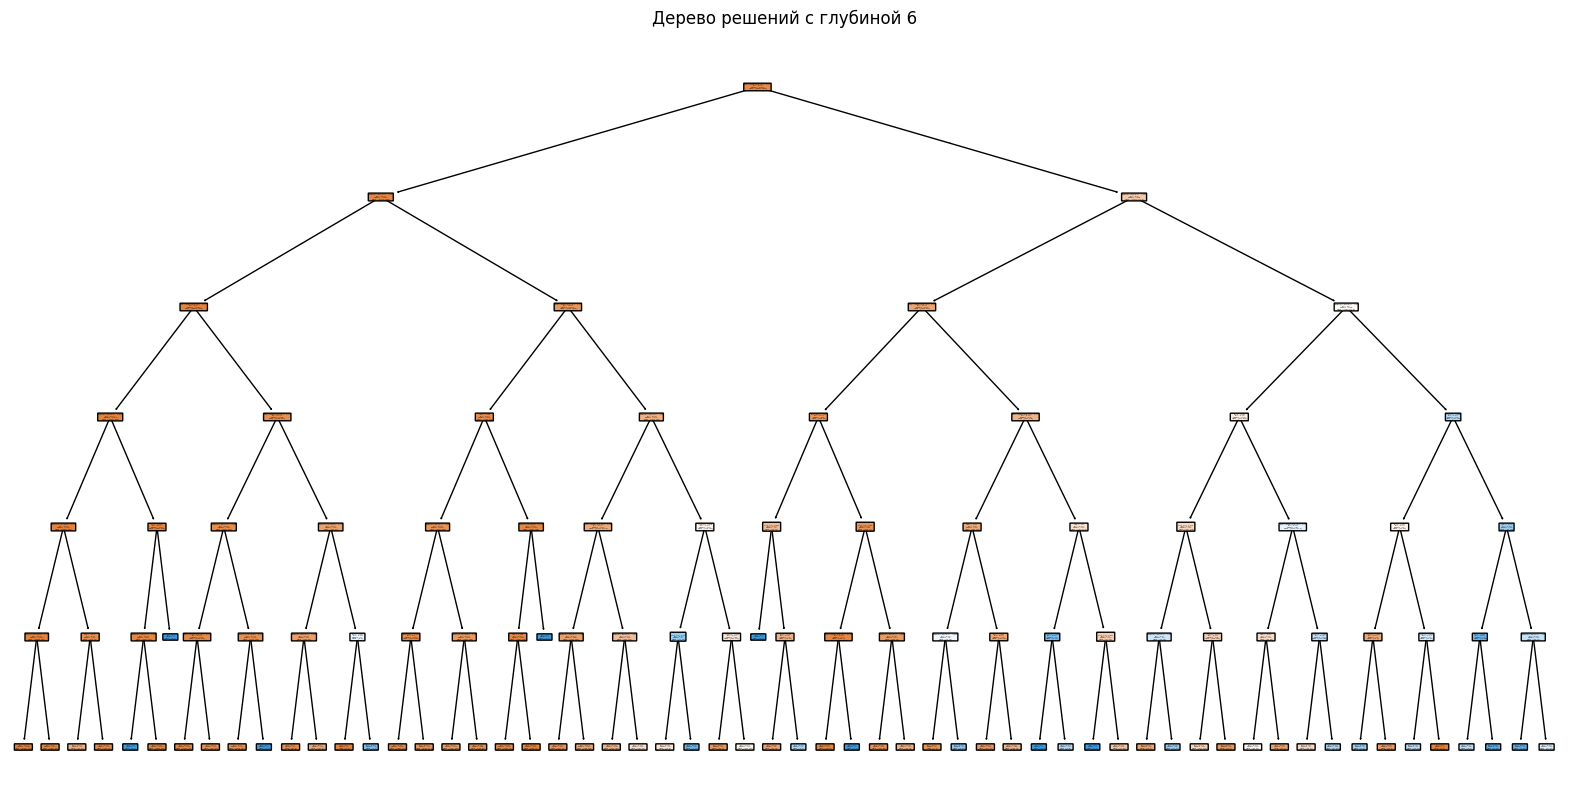

Оценка модели 6:
Accuracy: 0.9344
Precision: 0.5437
Recall: 0.1157
F1-score: 0.1908


In [ ]:
dt_model_6 = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model_6.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_6, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 6")
plt.show()

y_val_pred = dt_model_6.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 6:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

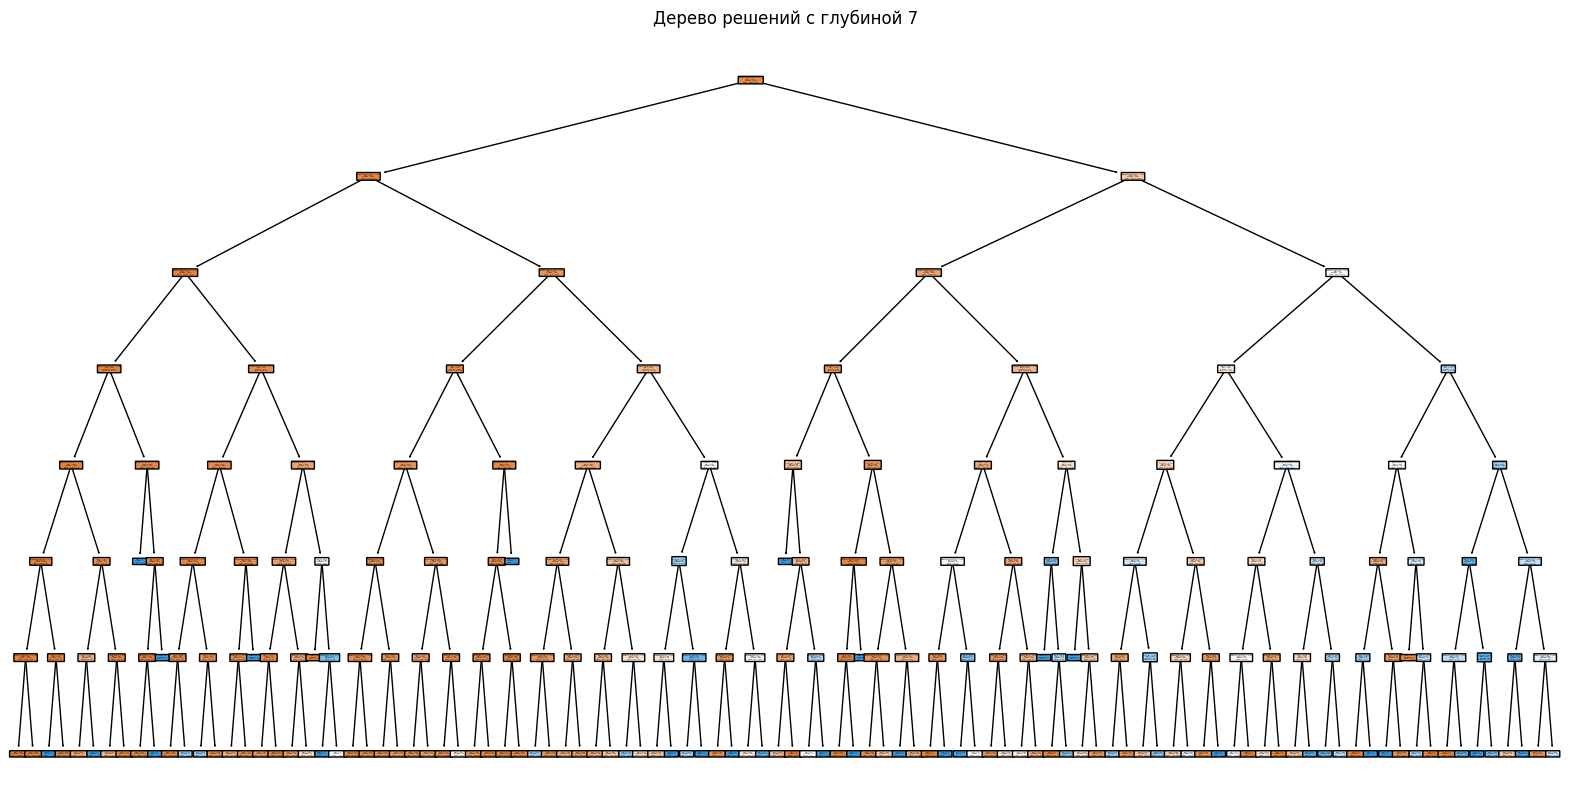

Оценка модели 7:
Accuracy: 0.9332
Precision: 0.5000
Recall: 0.1436
F1-score: 0.2231


In [ ]:
dt_model_7 = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_model_7.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_7, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 7")
plt.show()

y_val_pred = dt_model_7.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 7:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

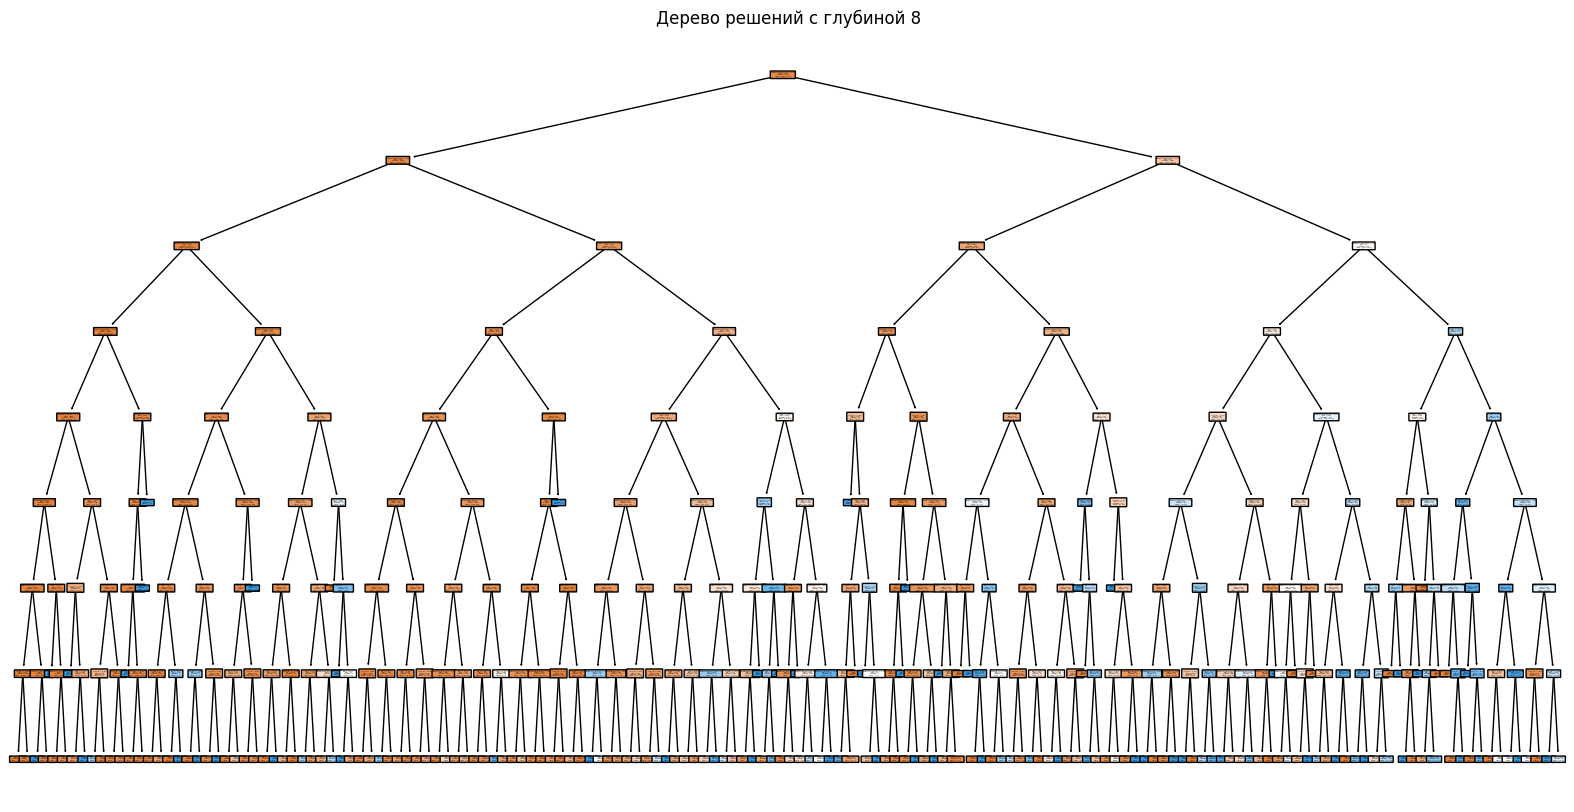

Оценка модели 8:
Accuracy: 0.9318
Precision: 0.4661
Recall: 0.1370
F1-score: 0.2117


In [ ]:
dt_model_8 = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model_8.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_8, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 8")
plt.show()

y_val_pred = dt_model_8.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 8:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

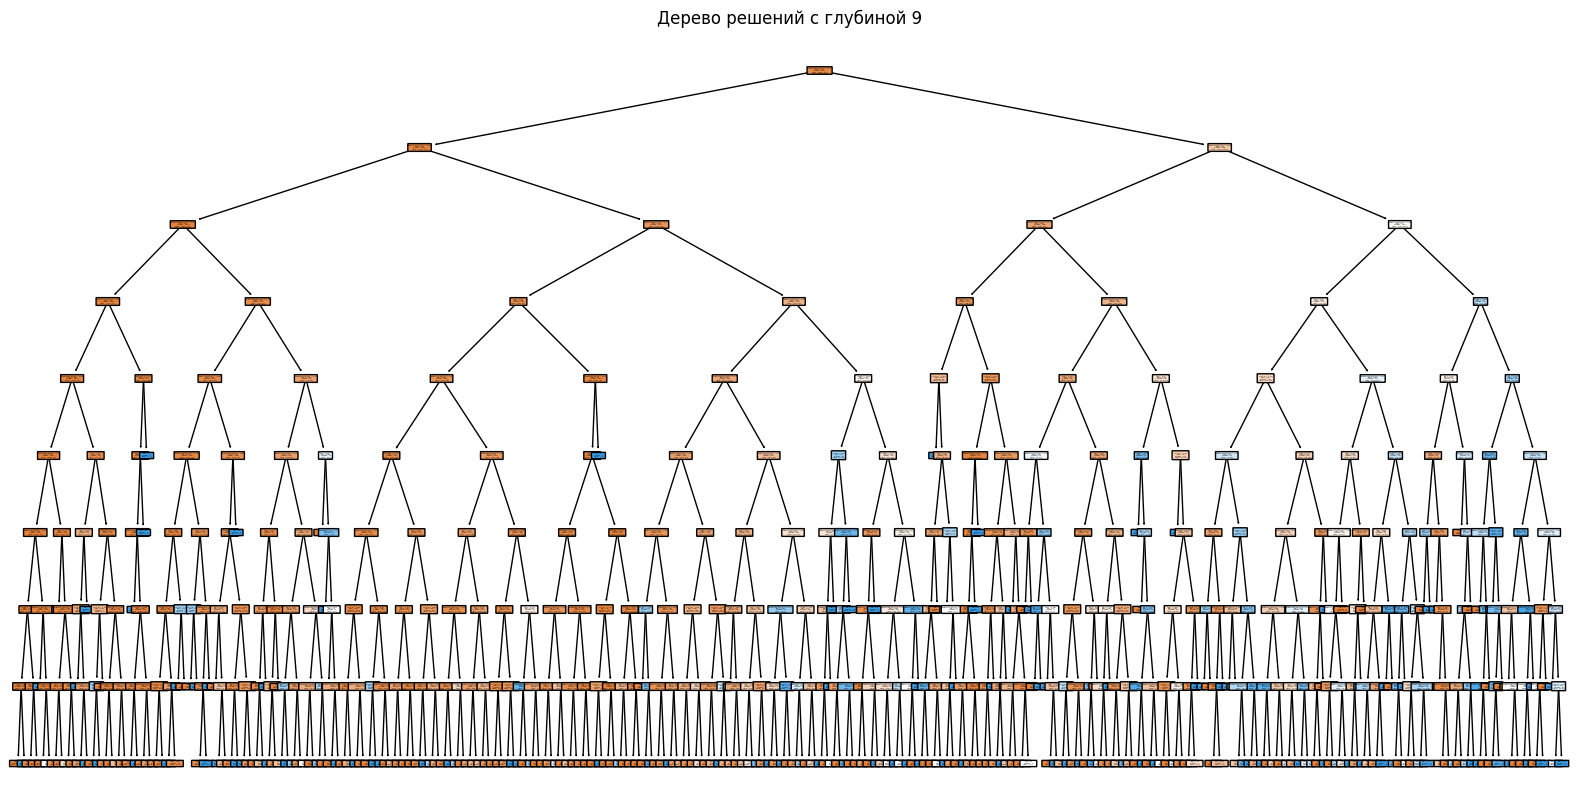

Оценка модели 9:
Accuracy: 0.9315
Precision: 0.4639
Recall: 0.1622
F1-score: 0.2404


In [ ]:
dt_model_9 = DecisionTreeClassifier(max_depth=9, random_state=42)
dt_model_9.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_9, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 9")
plt.show()

y_val_pred = dt_model_9.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 9:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

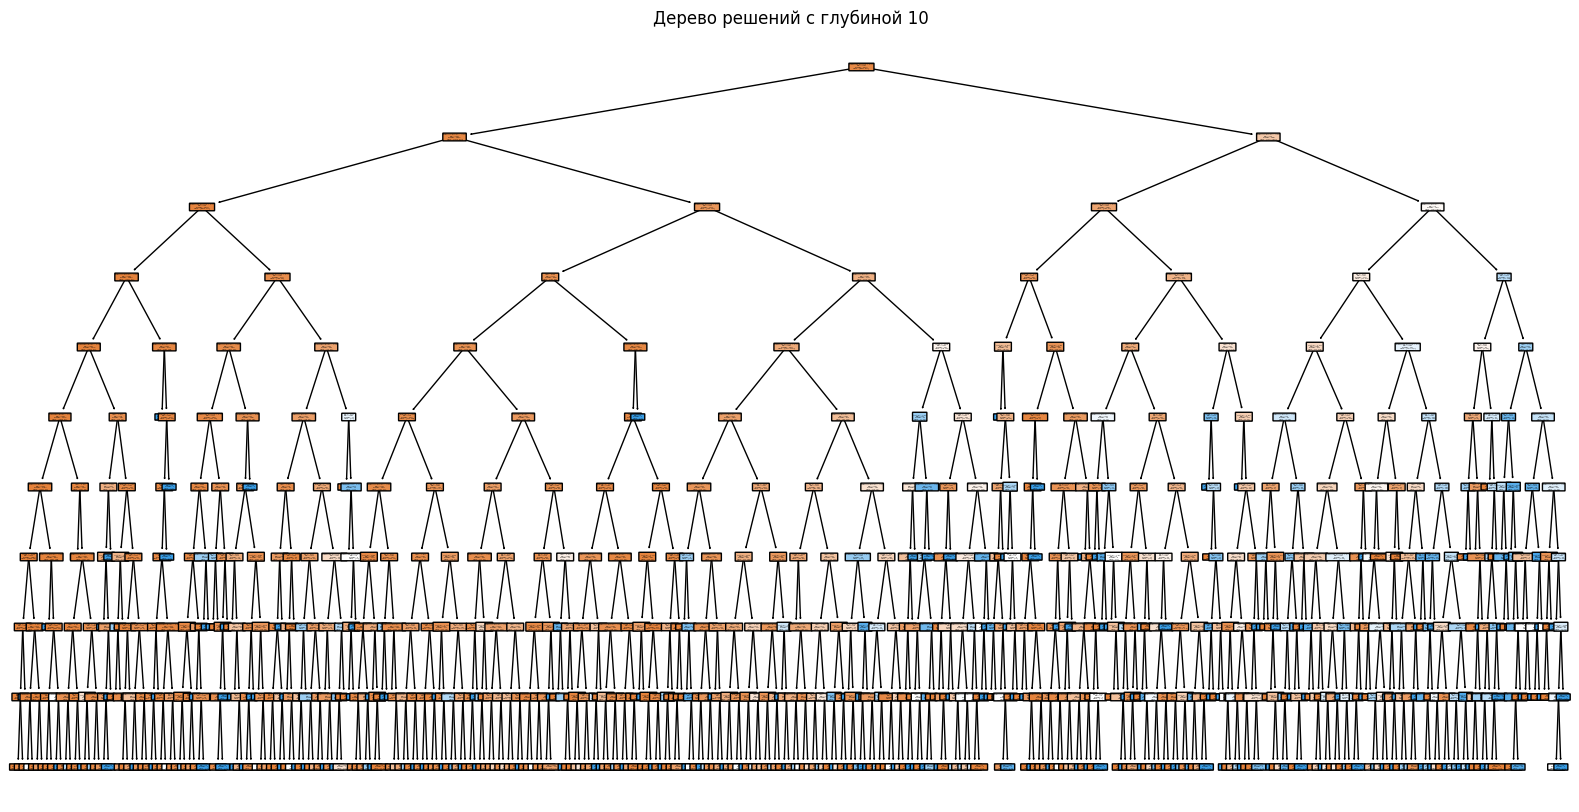

Оценка модели 10:
Accuracy: 0.9275
Precision: 0.3788
Recall: 0.1330
F1-score: 0.1969


In [ ]:
dt_model_10 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model_10.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_10, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 10")
plt.show()

y_val_pred = dt_model_10.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 10:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

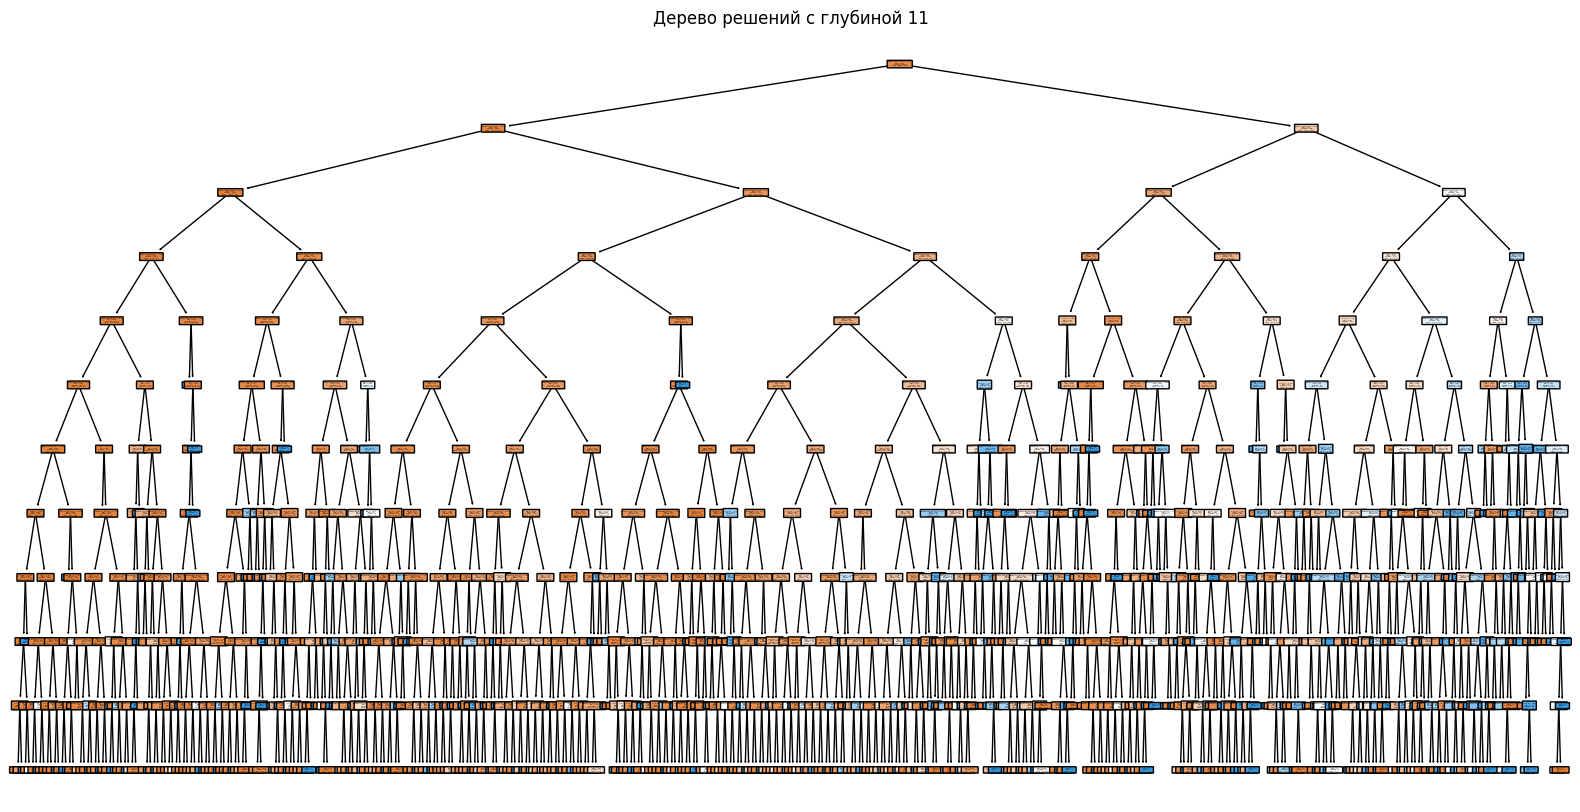

Оценка модели 11:
Accuracy: 0.9256
Precision: 0.3559
Recall: 0.1396
F1-score: 0.2006


In [ ]:
dt_model_11 = DecisionTreeClassifier(max_depth=11, random_state=42)
dt_model_11.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_model_11, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений с глубиной 11")
plt.show()

y_val_pred = dt_model_11.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели 11:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 31, 32, 35, 40, 45, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший F1-score:", grid_search.best_score_)

best_dt_model = grid_search.best_estimator_

Лучшие параметры: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Лучший F1-score: 0.2547221715697464


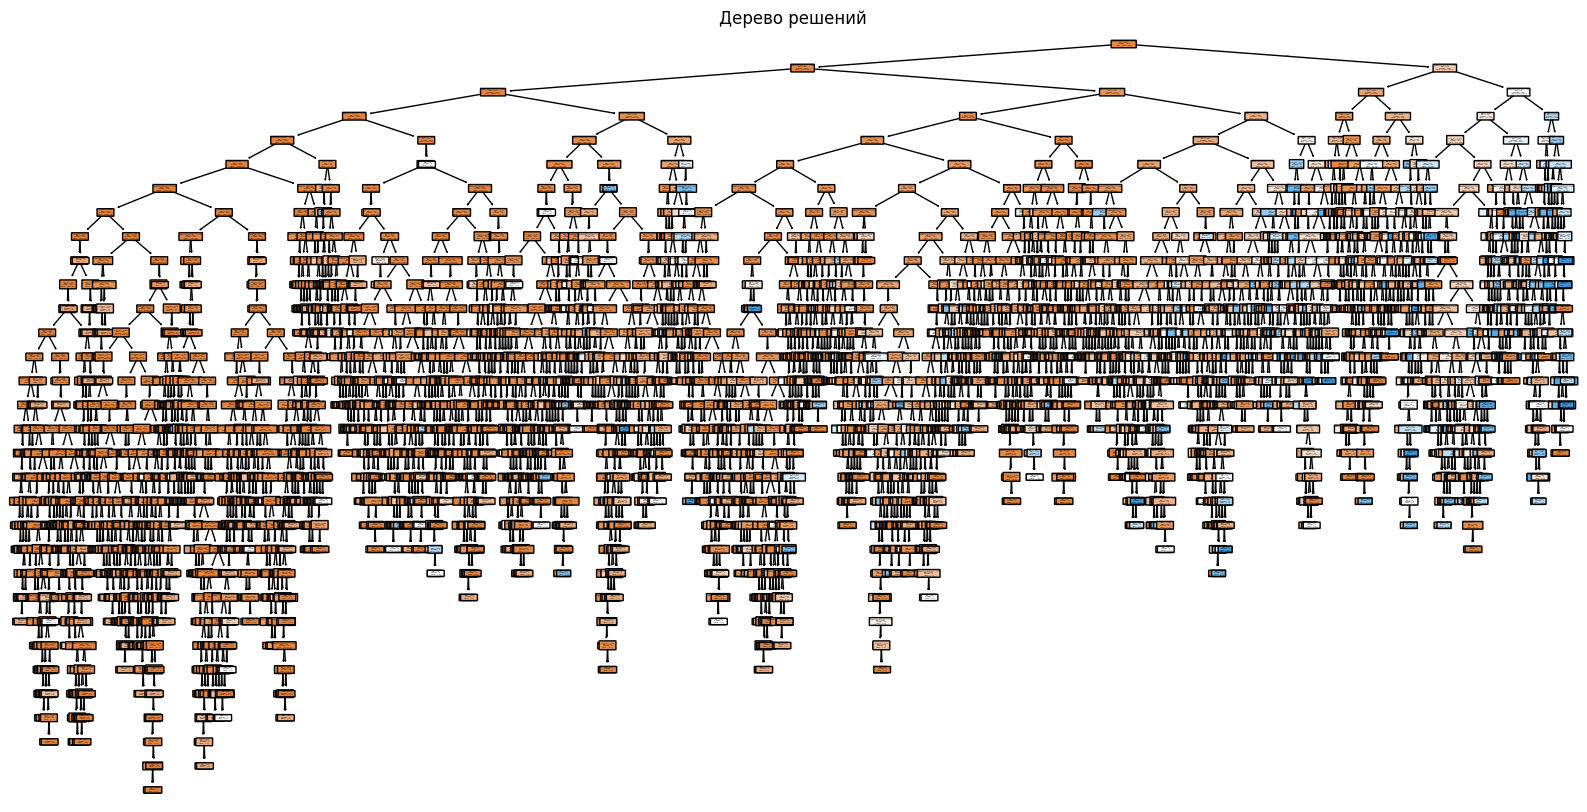

Оценка модели:
Accuracy: 0.9104
Precision: 0.2831
Recall: 0.2221
F1-score: 0.2489


In [ ]:
best_dt_model_tuned = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)
best_dt_model_tuned.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model_tuned, feature_names=X_train.columns, filled=True, class_names=['Not Delinquent', 'Delinquent'], rounded=True)
plt.title("Дерево решений")
plt.show()

y_val_pred = best_dt_model_tuned.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print("Оценка модели:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

In [ ]:
tree_depth = best_dt_model_tuned.get_depth()
print(f"Глубина дерева решений: {tree_depth}")

Глубина дерева решений: 31


# 3. Ансамблевые методы

- Выберите любую классическую модель (не ансамблевую) и обучите ансамбль с помощью бэггинга (BaggingClassifier). Подберите оптимальные параметры как  бэггинга так и модели с помощью GridSearhCV.
- Выберите любые классические модели (не ансамблевые) и обучите ансамбль с помощью стекинга (StackingClassifier). Подберите оптимальные параметры как  стекинга так и модели с помощью GridSearhCV.
- Обучите cлучайный лес (RandomForestClassifier), настройте гиперпараметры случайного леса с помощью GridSearhCV.
- Инициализируете параметры и обучите классификатор XGBoost (обратите внимание, что XGBoost работает только с числовыми признаками). Вычислите F test (не F score!) для оценки важности признаков в XGBoost.



## Бэггинг (Bagging)
**Принцип работы:** несколько базовых моделей (например, решающих деревьев) обучаются на различных случайных подвыборках исходных данных. Каждый базовый классификатор обучается независимо, и его предсказания объединяются для получения финального результата.

**Алгоритм:** из исходного набора данных создаются несколько подвыборок путём случайной выборки с возвращением (bootstrap). На каждой подвыборке обучается отдельная модель. Предсказания всех моделей комбинируются для получения финального результата

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [ ]:
lr = LogisticRegression(random_state=42)
bagging_model = BaggingClassifier(estimator=lr, random_state=42)

In [ ]:
median_dependents = X_train['NumDependents'].median()
X_train['NumDependents'].fillna(median_dependents, inplace=True)
X_val['NumDependents'].fillna(median_dependents, inplace=True)
X_test['NumDependents'].fillna(median_dependents, inplace=True)

/tmp/ipython-input-1459800085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['NumDependents'].fillna(median_dependents, inplace=True)
/tmp/ipython-input-1459800085.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='f1', n_jobs=-1)

grid_search_bagging.fit(X_train, y_train)

print("Лучшие параметры:", grid_search_bagging.best_params_)
print("Лучший F1-score для BaggingClassifier:", grid_search_bagging.best_score_)

best_bagging_model = grid_search_bagging.best_estimator_

In [ ]:
y_test_pred = best_bagging_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Оценка лучшей модели BaggingClassifier на тестовой выборке:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")

## Стекинг (Stacking)
**Принцип работы:** предсказания нескольких моделей используются в качестве входных данных для новой модели (метамодели). Метамодель обучается на этих предсказаниях, чтобы улучшить точность итогового предсказания.

**Алгоритм:** процесс стекинга включает следующие этапы:
- Несколько базовых моделей обучаются на исходных данных, и их предсказания сохраняются.
- На основе предсказаний базовых моделей обучается метамодель.
- Итоговое предсказание формируется на основе метамодели, которая может учитывать зависимость между предсказаниями базовых моделей.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier())
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=lr, cv=5)

param_grid_stacking = {
    'lr__C': [0.01, 0.1, 1, 10, 100],
    'dt__max_depth': [None, 5, 10, 15, 20],
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'final_estimator__C': [0.01, 0.1, 1, 10, 100]
}

grid_search_stacking = GridSearchCV(estimator=stacking_model, param_grid=param_grid_stacking, cv=3, scoring='f1', n_jobs=-1)

grid_search_stacking.fit(X_train, y_train)

print("Лучшие параметры:", grid_search_stacking.best_params_)
print("Лучший F1-score:", grid_search_stacking.best_score_)

best_stacking_model = grid_search_stacking.best_estimator_

y_test_pred_stacking = best_stacking_model.predict(X_test)

accuracy_test_stacking = accuracy_score(y_test, y_test_pred_stacking)
precision_test_stacking = precision_score(y_test, y_test_pred_stacking)
recall_test_stacking = recall_score(y_test, y_test_pred_stacking)
f1_test_stacking = f1_score(y_test, y_test_pred_stacking)

print("\nОценка лучшей модели StackingClassifier на тестовой выборке:")
print(f"Accuracy: {accuracy_test_stacking:.4f}")
print(f"Precision: {precision_test_stacking:.4f}")
print(f"Recall: {recall_test_stacking:.4f}")
print(f"F1-score: {f1_test_stacking:.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_rf, cv=3, scoring='f1', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Лучшие параметры для RandomForestClassifier:", grid_search_rf.best_params_)
print("Лучший F1-score для RandomForestClassifier:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_

y_test_pred_rf = best_rf_model.predict(X_test)

accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
precision_test_rf = precision_score(y_test, y_test_pred_rf)
recall_test_rf = recall_score(y_test, y_test_pred_rf)
f1_test_rf = f1_score(y_test, y_test_pred_rf)

print("\nОценка лучшей модели RandomForestClassifier на тестовой выборке:")
print(f"Accuracy: {accuracy_test_rf:.4f}")
print(f"Precision: {precision_test_rf:.4f}")
print(f"Recall: {recall_test_rf:.4f}")
print(f"F1-score: {f1_test_rf:.4f}")

In [ ]:
import xgboost as xgb
from sklearn.feature_selection import f_classif

xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

f_values, p_values = f_classif(X_train, y_train)

f_test_results = pd.DataFrame({'Feature': X_train.columns, 'F-value': f_values, 'P-value': p_values})

f_test_results = f_test_results.sort_values(by='F-value', ascending=False)

print("F-тест для оценки важности признаков в XGBoost:")
display(f_test_results)

y_test_pred_xgb = xgb_model.predict(X_test)

accuracy_test_xgb = accuracy_score(y_test, y_test_pred_xgb)
precision_test_xgb = precision_score(y_test, y_test_pred_xgb)
recall_test_xgb = recall_score(y_test, y_test_pred_xgb)
f1_test_xgb = f1_score(y_test, y_test_pred_xgb)

print("\nОценка модели XGBoost на тестовой выборке:")
print(f"Accuracy: {accuracy_test_xgb:.4f}")
print(f"Precision: {precision_test_xgb:.4f}")
print(f"Recall: {recall_test_xgb:.4f}")
print(f"F1-score: {f1_test_xgb:.4f}")

F-тест для оценки важности признаков в XGBoost:


Feature     F-value        P-value
2                    Age  679.161482  9.033784e-149
6  Num30-59Delinquencies  664.845197  1.071211e-145
7  Num60-89Delinquencies  403.462898   2.107253e-89
5          NumDependents  130.724173   3.089793e-30
3               NumLoans   58.524361   2.042016e-14
8                 Income   13.063207   3.014347e-04
0              client_id    6.054168   1.387671e-02
9   BalanceToCreditLimit    1.474436   2.246526e-01
4     NumRealEstateLoans    1.473571   2.247886e-01
1                    DIR    0.388781   5.329437e-01


Оценка модели XGBoost на тестовой выборке:
Accuracy: 0.9325
Precision: 0.4865
Recall: 0.1676
F1-score: 0.2493


Прошу прощения не успела закончить обучение. Как закончить. Пришлю итоговый вариант